# 🌐 NLP Notes: Tokenization & Embeddings
Comprehensive notes combining theory and code examples for understanding tokenization and embeddings in NLP.

## 2.5 Core NLP Concepts & Tokenization
### 🧩 Text Preprocessing
Text preprocessing prepares raw text for modeling by cleaning and structuring it. Common steps include:
- **Lowercasing:** Convert all text to lowercase for uniformity.
- **Removing punctuation and special characters.**
- **Stop Word Removal:** Removes commonly used words like 'the', 'is', 'and' that carry little meaning.
- **Stemming:** Reduces words to their root form by chopping off suffixes (e.g., *running → run*).
- **Lemmatization:** Converts a word to its meaningful base form (lemma) using linguistic context (e.g., *better → good*).

In [ ]:
import nltk
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

re.sub(pattern, replacement, string)

In [ ]:
text = "Serverless computing allows developers to run code without managing servers, automatically handling scaling and infrastructure. It lets you focus purely on writing functions while the cloud provider manages everything else behind the scenes."

# Lowercase and remove punctuation
text_clean = re.sub(r'[^a-zA-Z ]', '', text.lower())
text_clean

'serverless computing allows developers to run code without managing servers automatically handling scaling and infrastructure it lets you focus purely on writing functions while the cloud provider manages everything else behind the scenes'

In [ ]:
# Tokenization
tokens = nltk.word_tokenize(text_clean)
tokens

['serverless',
 'computing',
 'allows',
 'developers',
 'to',
 'run',
 'code',
 'without',
 'managing',
 'servers',
 'automatically',
 'handling',
 'scaling',
 'and',
 'infrastructure',
 'it',
 'lets',
 'you',
 'focus',
 'purely',
 'on',
 'writing',
 'functions',
 'while',
 'the',
 'cloud',
 'provider',
 'manages',
 'everything',
 'else',
 'behind',
 'the',
 'scenes']

In [ ]:
# Stopword removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens_nostop = []
for w in tokens:
  if w not in stop_words:
    tokens_nostop.append(w)
tokens_nostop

['serverless',
 'computing',
 'allows',
 'developers',
 'run',
 'code',
 'without',
 'managing',
 'servers',
 'automatically',
 'handling',
 'scaling',
 'infrastructure',
 'lets',
 'focus',
 'purely',
 'writing',
 'functions',
 'cloud',
 'provider',
 'manages',
 'everything',
 'else',
 'behind',
 'scenes']

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stems = []
for w in tokens_nostop:
  stems.append(stemmer.stem(w))
stems

['serverless',
 'comput',
 'allow',
 'develop',
 'run',
 'code',
 'without',
 'manag',
 'server',
 'automat',
 'handl',
 'scale',
 'infrastructur',
 'let',
 'focu',
 'pure',
 'write',
 'function',
 'cloud',
 'provid',
 'manag',
 'everyth',
 'els',
 'behind',
 'scene']

In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmas = []
for w in tokens_nostop:
  lemmas.append(lemmatizer.lemmatize(w))
lemmas

['serverless',
 'computing',
 'allows',
 'developer',
 'run',
 'code',
 'without',
 'managing',
 'server',
 'automatically',
 'handling',
 'scaling',
 'infrastructure',
 'let',
 'focus',
 'purely',
 'writing',
 'function',
 'cloud',
 'provider',
 'manages',
 'everything',
 'else',
 'behind',
 'scene']

In [ ]:
print('Original:', tokens)
print('Without Stopwords:', tokens_nostop)
print('Stemmed:', stems)
print('Lemmatized:', lemmas)

Original: ['serverless', 'computing', 'allows', 'developers', 'to', 'run', 'code', 'without', 'managing', 'servers', 'automatically', 'handling', 'scaling', 'and', 'infrastructure', 'it', 'lets', 'you', 'focus', 'purely', 'on', 'writing', 'functions', 'while', 'the', 'cloud', 'provider', 'manages', 'everything', 'else', 'behind', 'the', 'scenes']
Without Stopwords: ['serverless', 'computing', 'allows', 'developers', 'run', 'code', 'without', 'managing', 'servers', 'automatically', 'handling', 'scaling', 'infrastructure', 'lets', 'focus', 'purely', 'writing', 'functions', 'cloud', 'provider', 'manages', 'everything', 'else', 'behind', 'scenes']
Stemmed: ['serverless', 'comput', 'allow', 'develop', 'run', 'code', 'without', 'manag', 'server', 'automat', 'handl', 'scale', 'infrastructur', 'let', 'focu', 'pure', 'write', 'function', 'cloud', 'provid', 'manag', 'everyth', 'els', 'behind', 'scene']
Lemmatized: ['serverless', 'computing', 'allows', 'developer', 'run', 'code', 'without', 'mana

### ✂️ Tokenization
Tokenization splits text into smaller units (tokens) like words or subwords.
Transformers use **subword tokenization** to handle unknown words and reduce vocabulary size.

**Types:**
- **Word-level:** Splits by spaces.
- **Subword-level:** Breaks rare words into frequent subwords (e.g., *unhappiness → un + happiness*).
- **Character-level:** Splits every character.

In [ ]:
from transformers import GPT2Tokenizer, GPT2Model
import torch

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = "Transformers are revolutionizing natural language processing!"

tokens = tokenizer.tokenize(text)
ids = tokenizer.convert_tokens_to_ids(tokens)


In [ ]:
print("Tokens:", tokens)
print("Token IDs:", ids)
print("Decoded:", tokenizer.decode(ids))


Tokens: ['Transform', 'ers', 'Ġare', 'Ġrevolution', 'izing', 'Ġnatural', 'Ġlanguage', 'Ġprocessing', '!']
Token IDs: [41762, 364, 389, 5854, 2890, 3288, 3303, 7587, 0]
Decoded: Transformers are revolutionizing natural language processing!


In [ ]:
embeddings = model.get_input_embeddings()(torch.tensor([ids]))

print("\nEmbeddings:", embeddings)
print("\nEmbeddings shape:", embeddings.shape)


Embeddings: tensor([[[-0.0224, -0.0096,  0.2098,  ..., -0.1047,  0.1069,  0.0804],
         [-0.1837, -0.1653,  0.1088,  ..., -0.0195,  0.0016, -0.0625],
         [ 0.0756,  0.0559,  0.0481,  ...,  0.0595, -0.0550,  0.0846],
         ...,
         [-0.0991, -0.0051,  0.0735,  ...,  0.1375,  0.2273, -0.0890],
         [ 0.0484,  0.0041, -0.0085,  ...,  0.1293,  0.0389,  0.0108],
         [-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453]]],
       grad_fn=<EmbeddingBackward0>)

Embeddings shape: torch.Size([1, 9, 768])


### 🧠 Understanding Input to LLMs
- **Tokens:** Basic input units of text after tokenization.
- **Vocabulary Size:** Number of unique tokens known to the model (e.g., GPT-2 has ~50k tokens).
- **Max Length:** The maximum number of tokens the model can process at once (e.g., 1024 for GPT-2).

Each input sentence is converted into token IDs, padded/truncated to a fixed length before feeding into the model.

### 🧭 Positional Encoding in Transformers
Transformers have no built-in notion of word order, so **positional encoding** adds order information to token embeddings.

The positional encoding vector is added to the input embedding at each position. It uses sine and cosine functions:
$PE_{(pos, 2i)} = sin(pos / 10000^{2i/d_{model}})$
$PE_{(pos, 2i+1)} = cos(pos / 10000^{2i/d_{model}})$


In [ ]:
import numpy as np

def positional_encoding(seq_len, d_model):
    PE = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** ((2 * i)/d_model)))
            PE[pos, i + 1] = np.cos(pos / (10000 ** ((2 * i)/d_model)))
    return PE

# Example with a short sentence (e.g., 10 tokens) and an embedding dimension of 16
pe = positional_encoding(10, 16)
print("Positional Encoding for a sequence of length 10:")
print(pe)

Positional Encoding for a sequence of length 10:
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  9.98334166e-02  9.95004165e-01
   9.99983333e-03  9.99950000e-01  9.99999833e-04  9.99999500e-01
   9.99999998e-05  9.99999995e-01  1.00000000e-05  1.00000000e+00
   1.00000000e-06  1.00000000e+00  1.00000000e-07  1.00000000e+00]
 [ 9.09297427e-01 -4.16146837e-01  1.98669331e-01  9.80066578e-01
   1.99986667e-02  9.99800007e-01  1.99999867e-03  9.99998000e-01
   1.99999999e-04  9.99999980e-01  2.00000000e-05  1.00000000e+00
   2.00000000e-06  1.00000000e+00  2.00000000e-07  1.00000000e+00]
 [ 1.41120008e-01 -9.89992497e-01  2.95520207e-01  9.55336489e-01
   2.99955002e-02  9.99550034e-01  2.99999550e-03  9.99995500e-01
   2.99999995e-04  9.999

## Embeddings
### 💡 Concept
Embeddings represent words, sentences, or documents as numerical vectors in a high-dimensional space where similar meanings are closer together.

### 📚 Traditional Methods before Transformers
1. **Bag of Words (BoW):** Represents text as word frequency counts.
2. **TF-IDF:** Weighs words based on frequency and importance.
3. **Word2Vec / GloVe:** Learns word meanings through neural networks.

🧩 Bag of Words (BoW):
BoW converts text into numerical vectors by counting how many times each word appears in a document. It:

Tokenizes text into words

Builds a vocabulary of unique words from the corpus

Represents each document as a vector of word counts (ignores grammar and word order)

Example:
["I love NLP", "NLP is fun"] → vocabulary = [I, is, love, NLP, fun]
Vectors = [[1,0,1,1,0], [0,1,0,1,1]]

Disadvantages -

High-dimensional & sparse (lots of zeros).

No understanding of meaning or context.

Examples:

Spam detection ("buy now", "free offer")

Basic text classification (news categories, sentiment)

Keyword extraction

In [ ]:
corpus = [
    "NLP is amazing for understanding text.",
    "Machine learning and NLP are closely related.",
    "Transformers have revolutionized NLP."
]

In [ ]:
# BoW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(corpus)
print("BoW Feature Names:", vectorizer.get_feature_names_out())
print(bow.toarray())

BoW Feature Names: ['amazing' 'and' 'are' 'closely' 'for' 'have' 'is' 'learning' 'machine'
 'nlp' 'related' 'revolutionized' 'text' 'transformers' 'understanding']
[[1 0 0 0 1 0 1 0 0 1 0 0 1 0 1]
 [0 1 1 1 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 1 0 1 0]]


1. Term Frequency (TF)

Measures how often a word appears in a single document.

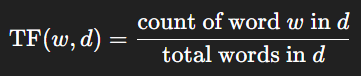

2. Inverse Document Frequency (IDF)

Measures how unique or rare a word is across all documents.

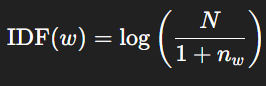

Where:

N = total number of documents

nw = number of documents containing the word

Examples:

Document similarity (plagiarism detection, duplicate detection)

Feature input for classical ML models (Naive Bayes, SVM)

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
print("\nTF-IDF Feature Names:", tfidf.get_feature_names_out())
print(tfidf_matrix.toarray())



TF-IDF Feature Names: ['amazing' 'and' 'are' 'closely' 'for' 'have' 'is' 'learning' 'machine'
 'nlp' 'related' 'revolutionized' 'text' 'transformers' 'understanding']
[[0.43238509 0.         0.         0.         0.43238509 0.
  0.43238509 0.         0.         0.2553736  0.         0.
  0.43238509 0.         0.43238509]
 [0.         0.39687454 0.39687454 0.39687454 0.         0.
  0.         0.39687454 0.39687454 0.2344005  0.39687454 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.54645401
  0.         0.         0.         0.32274454 0.         0.54645401
  0.         0.54645401 0.        ]]


Word2Vec is a technique that converts words into dense, fixed-length vectors (embeddings) such that words with similar meanings have similar vectors.

⚙️ How Word2Vec Works

Word2Vec uses neural networks to learn word embeddings in two main models:

1️⃣ CBOW (Continuous Bag of Words)

Predicts a target word from its surrounding context words.

Example:

Sentence: "The cat sits on the mat"

Target: "sits"
Context: ["The", "cat", "on", "the", "mat"]

Input → context word vectors

Output → probability of target word

Training → adjust embeddings so that words appearing in similar contexts have similar vectors

2️⃣ Skip-Gram

Opposite of CBOW: predicts context words from a target word.

Example:

Target: "cat"
Context: ["The", "sits"]

Input → target word vector

Output → probability distribution over context words

Works well for small datasets and captures rare words better

🔹 Training Steps

Initialize embeddings randomly for all words.

For each word in the corpus, create training pairs:

CBOW: context → target

Skip-gram: target → context

Train a shallow neural network (1 hidden layer) to predict outputs.

After training, the hidden layer weights are the word embeddings.

Examples:

Word similarity and analogy tasks

Sentiment analysis (using embeddings as features)

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec

sentences = [s.lower().split() for s in corpus]
w2v_model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, workers=2)

print("Vector for 'nlp':\n", w2v_model.wv['nlp'])
print("\nMost similar to 'nlp':", w2v_model.wv.most_similar('nlp'))


Vector for 'nlp':
 [-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]

Most similar to 'nlp': [('amazing', 0.21057100594043732), ('text.', 0.16704076528549194), ('for', 0.150198832154274), ('are', 0.13204392790794373), ('revolutionized', 0.1267007291316986), ('learning', 0.0998455360531

### 🚀 Modern Sentence Embeddings
Transformer-based models like BERT and Sentence Transformers produce **contextual embeddings**, meaning word vectors depend on surrounding context.

For example, the word *bank* has different embeddings in 'river bank' vs 'bank account'.


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = ["I love playing football.", "Soccer is a great sport.", "I enjoy coding."]
embeddings = model.encode(sentences)

print("Embedding shape:", embeddings.shape)
print("\nSimilarity between first two sentences:")
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity([embeddings[0]], [embeddings[1]]))


Embedding shape: (3, 384)

Similarity between first two sentences:
[[0.5901931]]
